<a href="https://colab.research.google.com/github/x200706/AIML/blob/main/ML/%E6%B3%A2%E5%A3%AB%E9%A0%93%E6%88%BF%E5%83%B9%E9%A0%90%E6%B8%ACCNN%E7%89%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import與資料前處理

In [ ]:
"""前面引用過了，但如果想從這邊才開始執行，需要執行這段import"""
import numpy as np

import keras
from keras import models
from keras import layers
from keras.datasets import boston_housing
from keras.optimizers import Adam
# from keras import backend as K

import matplotlib.pyplot as plt

import time

In [ ]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

# CNN需要一個通道維度
train_data = train_data.reshape((train_data.shape[0], 13, 1))
test_data = test_data.reshape((test_data.shape[0], 13, 1))

## 不同結構（大小、是否冷凍層）與filter數量的CNN模型

In [ ]:
# 定義 CNN 模型函數
def build_cnn_model(set_layers, filter_size, frozen_layer, num_filters=32):
    model = models.Sequential()

    if set_layers not in [1, 3]:
        print('這不是今天要測的！')
        return None
    if set_layers >= 1:
        model.add(layers.Conv1D(num_filters, filter_size, activation='relu', input_shape=(13, 1)))
        model.add(layers.MaxPooling1D(pool_size=2)) # 都有池化層加快訓練時間
    if set_layers == 3:
        model.add(layers.Conv1D(num_filters, filter_size, activation='relu'))
        model.add(layers.Conv1D(num_filters, filter_size, activation='relu'))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    if frozen_layer and set_layers == 3:
        model.layers[0].trainable = False  # 冷凍第一層Conv1D
        print("已冷凍第一層卷積層Conv1D")

    model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])

    # 檢查層狀態
    print("\n層狀態：")
    for layer in model.layers:
        print(f"Layer {layer.name}: Trainable = {layer.trainable}")

    return model

# 訓練並評估
def train_and_evaluate(set_layers, filter_size, frozen_layer):
    model = build_cnn_model(set_layers, filter_size, frozen_layer)
    # 訓練計時
    start_time = time.time()
    history = model.fit(train_data, train_targets,
                        epochs=80, batch_size=16,
                        validation_split=0.2, verbose=0)
    train_time = time.time() - start_time

    test_mse, test_mae = model.evaluate(test_data, test_targets, verbose=0)
    print(f"Layers: {set_layers}, Filter Size: {filter_size}, Test MAE = {test_mae:.2f}")

    # 繪製訓練過程圖
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title(f'MAE vs Epochs\n(Layers: {set_layers}, Filter Size: {filter_size}, Frozen: {frozen_layer})')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()
    plt.grid(True)
    plt.show()

    return test_mae

開始測試CNN結構和濾波器大小...

層狀態：
Layer conv1d_28: Trainable = True
Layer max_pooling1d_11: Trainable = True
Layer flatten_16: Trainable = True
Layer dense_32: Trainable = True
Layer dense_33: Trainable = True
Layers: 1, Filter Size: 3, Test MAE = 3.56


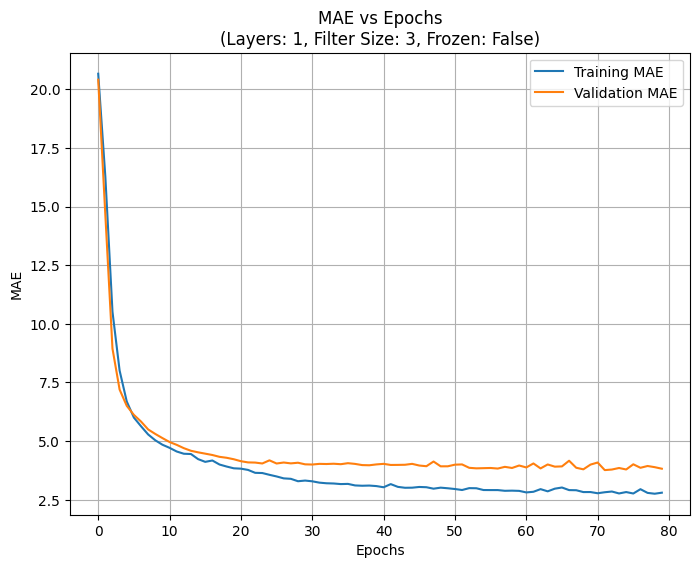


層狀態：
Layer conv1d_29: Trainable = True
Layer max_pooling1d_12: Trainable = True
Layer flatten_17: Trainable = True
Layer dense_34: Trainable = True
Layer dense_35: Trainable = True
Layers: 1, Filter Size: 7, Test MAE = 3.32


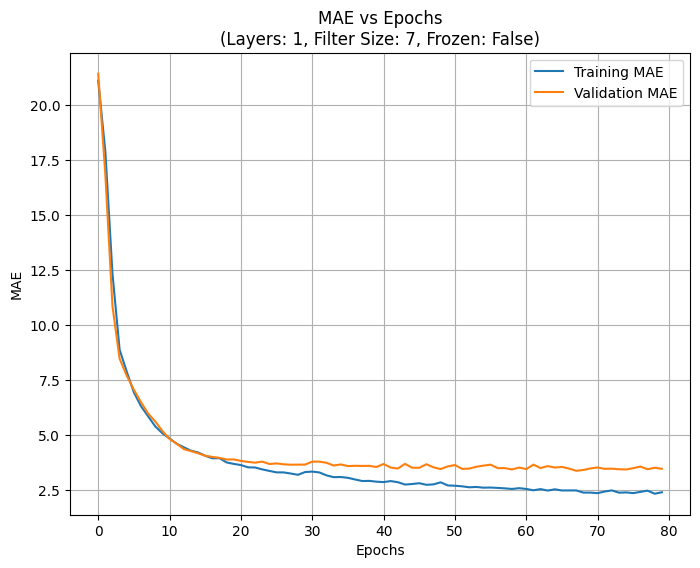


層狀態：
Layer conv1d_30: Trainable = True
Layer max_pooling1d_13: Trainable = True
Layer flatten_18: Trainable = True
Layer dense_36: Trainable = True
Layer dense_37: Trainable = True
Layers: 1, Filter Size: 11, Test MAE = 3.61


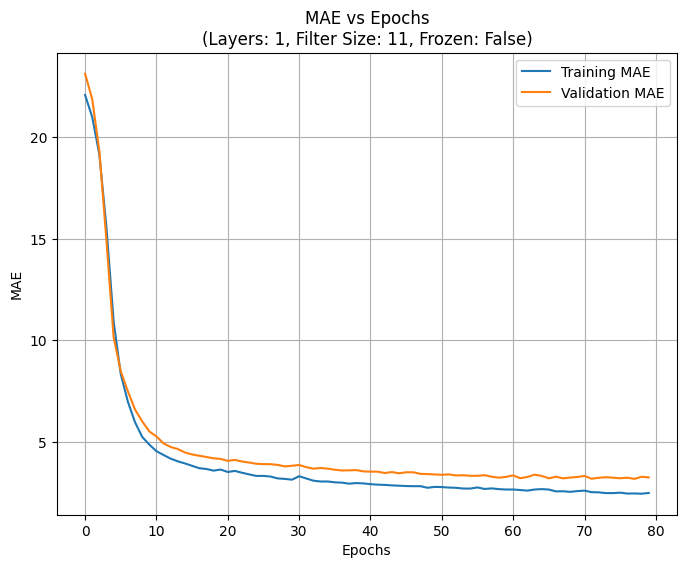


層狀態：
Layer conv1d_31: Trainable = True
Layer max_pooling1d_14: Trainable = True
Layer conv1d_32: Trainable = True
Layer conv1d_33: Trainable = True
Layer flatten_19: Trainable = True
Layer dense_38: Trainable = True
Layer dense_39: Trainable = True
Layers: 3, Filter Size: 3, Test MAE = 3.48


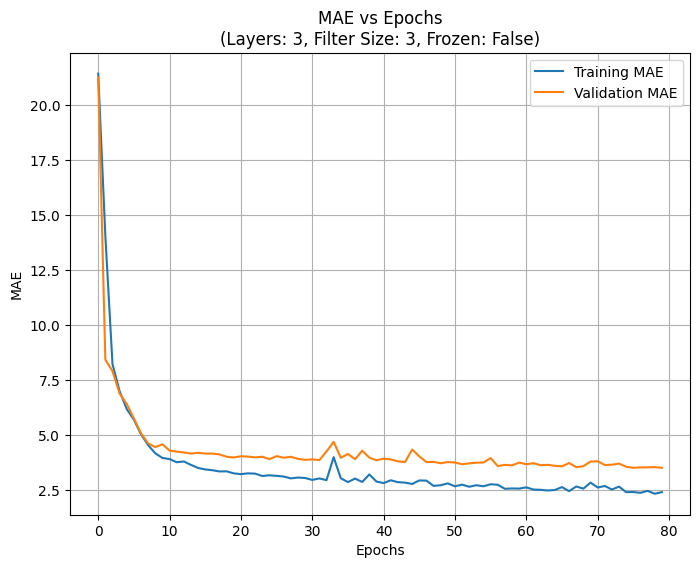

已冷凍第一層卷積層Conv1D

層狀態：
Layer conv1d_34: Trainable = False
Layer max_pooling1d_15: Trainable = True
Layer conv1d_35: Trainable = True
Layer conv1d_36: Trainable = True
Layer flatten_20: Trainable = True
Layer dense_40: Trainable = True
Layer dense_41: Trainable = True
Layers: 3, Filter Size: 3, Test MAE = 3.31


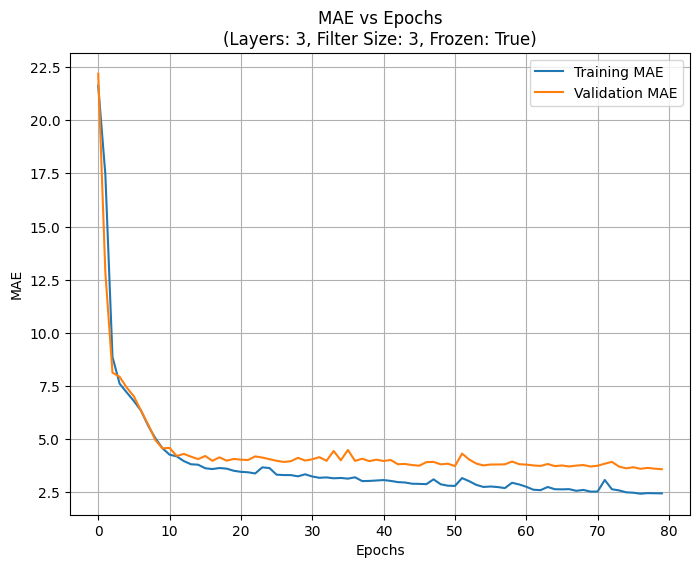


總結結果：
1_layer_3_filters: MAE = 3.56
1_layer_7_filters: MAE = 3.32
1_layer_11_filters: MAE = 3.61
3_layer_1_filters: MAE = 3.48
3_layer_1_filters_frozen: MAE = 3.31


In [ ]:
# 測試不同結構和濾波器大小
print("開始測試CNN結構和濾波器大小...")
results = {}

# 淺層
results['1_layer_3_filters'] = train_and_evaluate(1, 3, frozen_layer=False)
results['1_layer_7_filters'] = train_and_evaluate(1, 7, frozen_layer=False)
results['1_layer_11_filters'] = train_and_evaluate(1, 11, frozen_layer=False)

# 深層
results['3_layer_1_filters'] = train_and_evaluate(3, 3, frozen_layer=False)
results['3_layer_1_filters_frozen'] = train_and_evaluate(3, 3, frozen_layer=True)

# 總結結果
print("\n總結結果：")
for key, mae in results.items():
    print(f"{key}: MAE = {mae:.2f}")